# Result Checking

In [1]:
import struct

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Define some functions:

In [2]:
def read_results(file_name):
    """ Read results file
    """
    with open(file_name, 'rb') as fil:
        N, D = struct.unpack('II', fil.read(8))
        print("N={}\tD={}".format(N, D))
        Y = np.array(struct.unpack("{}d".format(N * D), fil.read(8 * N * D)))
        Y = Y.reshape(N, D)
    return Y


def read_labels(file_name):
    """ Read labels file from MNIST dataset
    """
    with open(file_name, 'rb') as fil:
        magic_number, N = struct.unpack('>II', fil.read(8))
        assert magic_number == 2049, "magic number is not 2049, {} found".format(
            magic_number)
        labels = np.array(struct.unpack("{}B".format(N), fil.read(N)))
    return labels


def plot_embedding(X, labels, title=None, pad=.03, save_fig=None):
    """ Plot the 2D embeddings
    """
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    x_range = x_max - x_min

    plt.figure(figsize=(15, 10), dpi=300)
    for i in range(X.shape[0]):
        plt.text(
            X[i, 0],
            X[i, 1],
            str(labels[i]),
            color=plt.cm.Set1(labels[i] / 10.),
            fontdict={'weight': 'bold',
                      'size': 10})

    plt.xticks([])
    plt.yticks([])
    plt.xlim([x_min[0] - pad * x_range[0], x_max[0] + pad * x_range[0]])
    plt.ylim([x_min[1] - pad * x_range[1], x_max[1] + pad * x_range[1]])
    if title is not None:
        plt.title(title, fontsize=16)
    if save_fig is not None:
        plt.savefig(save_fig, bbox_inches='tight')
    plt.show()

## Original Implementation

N=1000	D=2


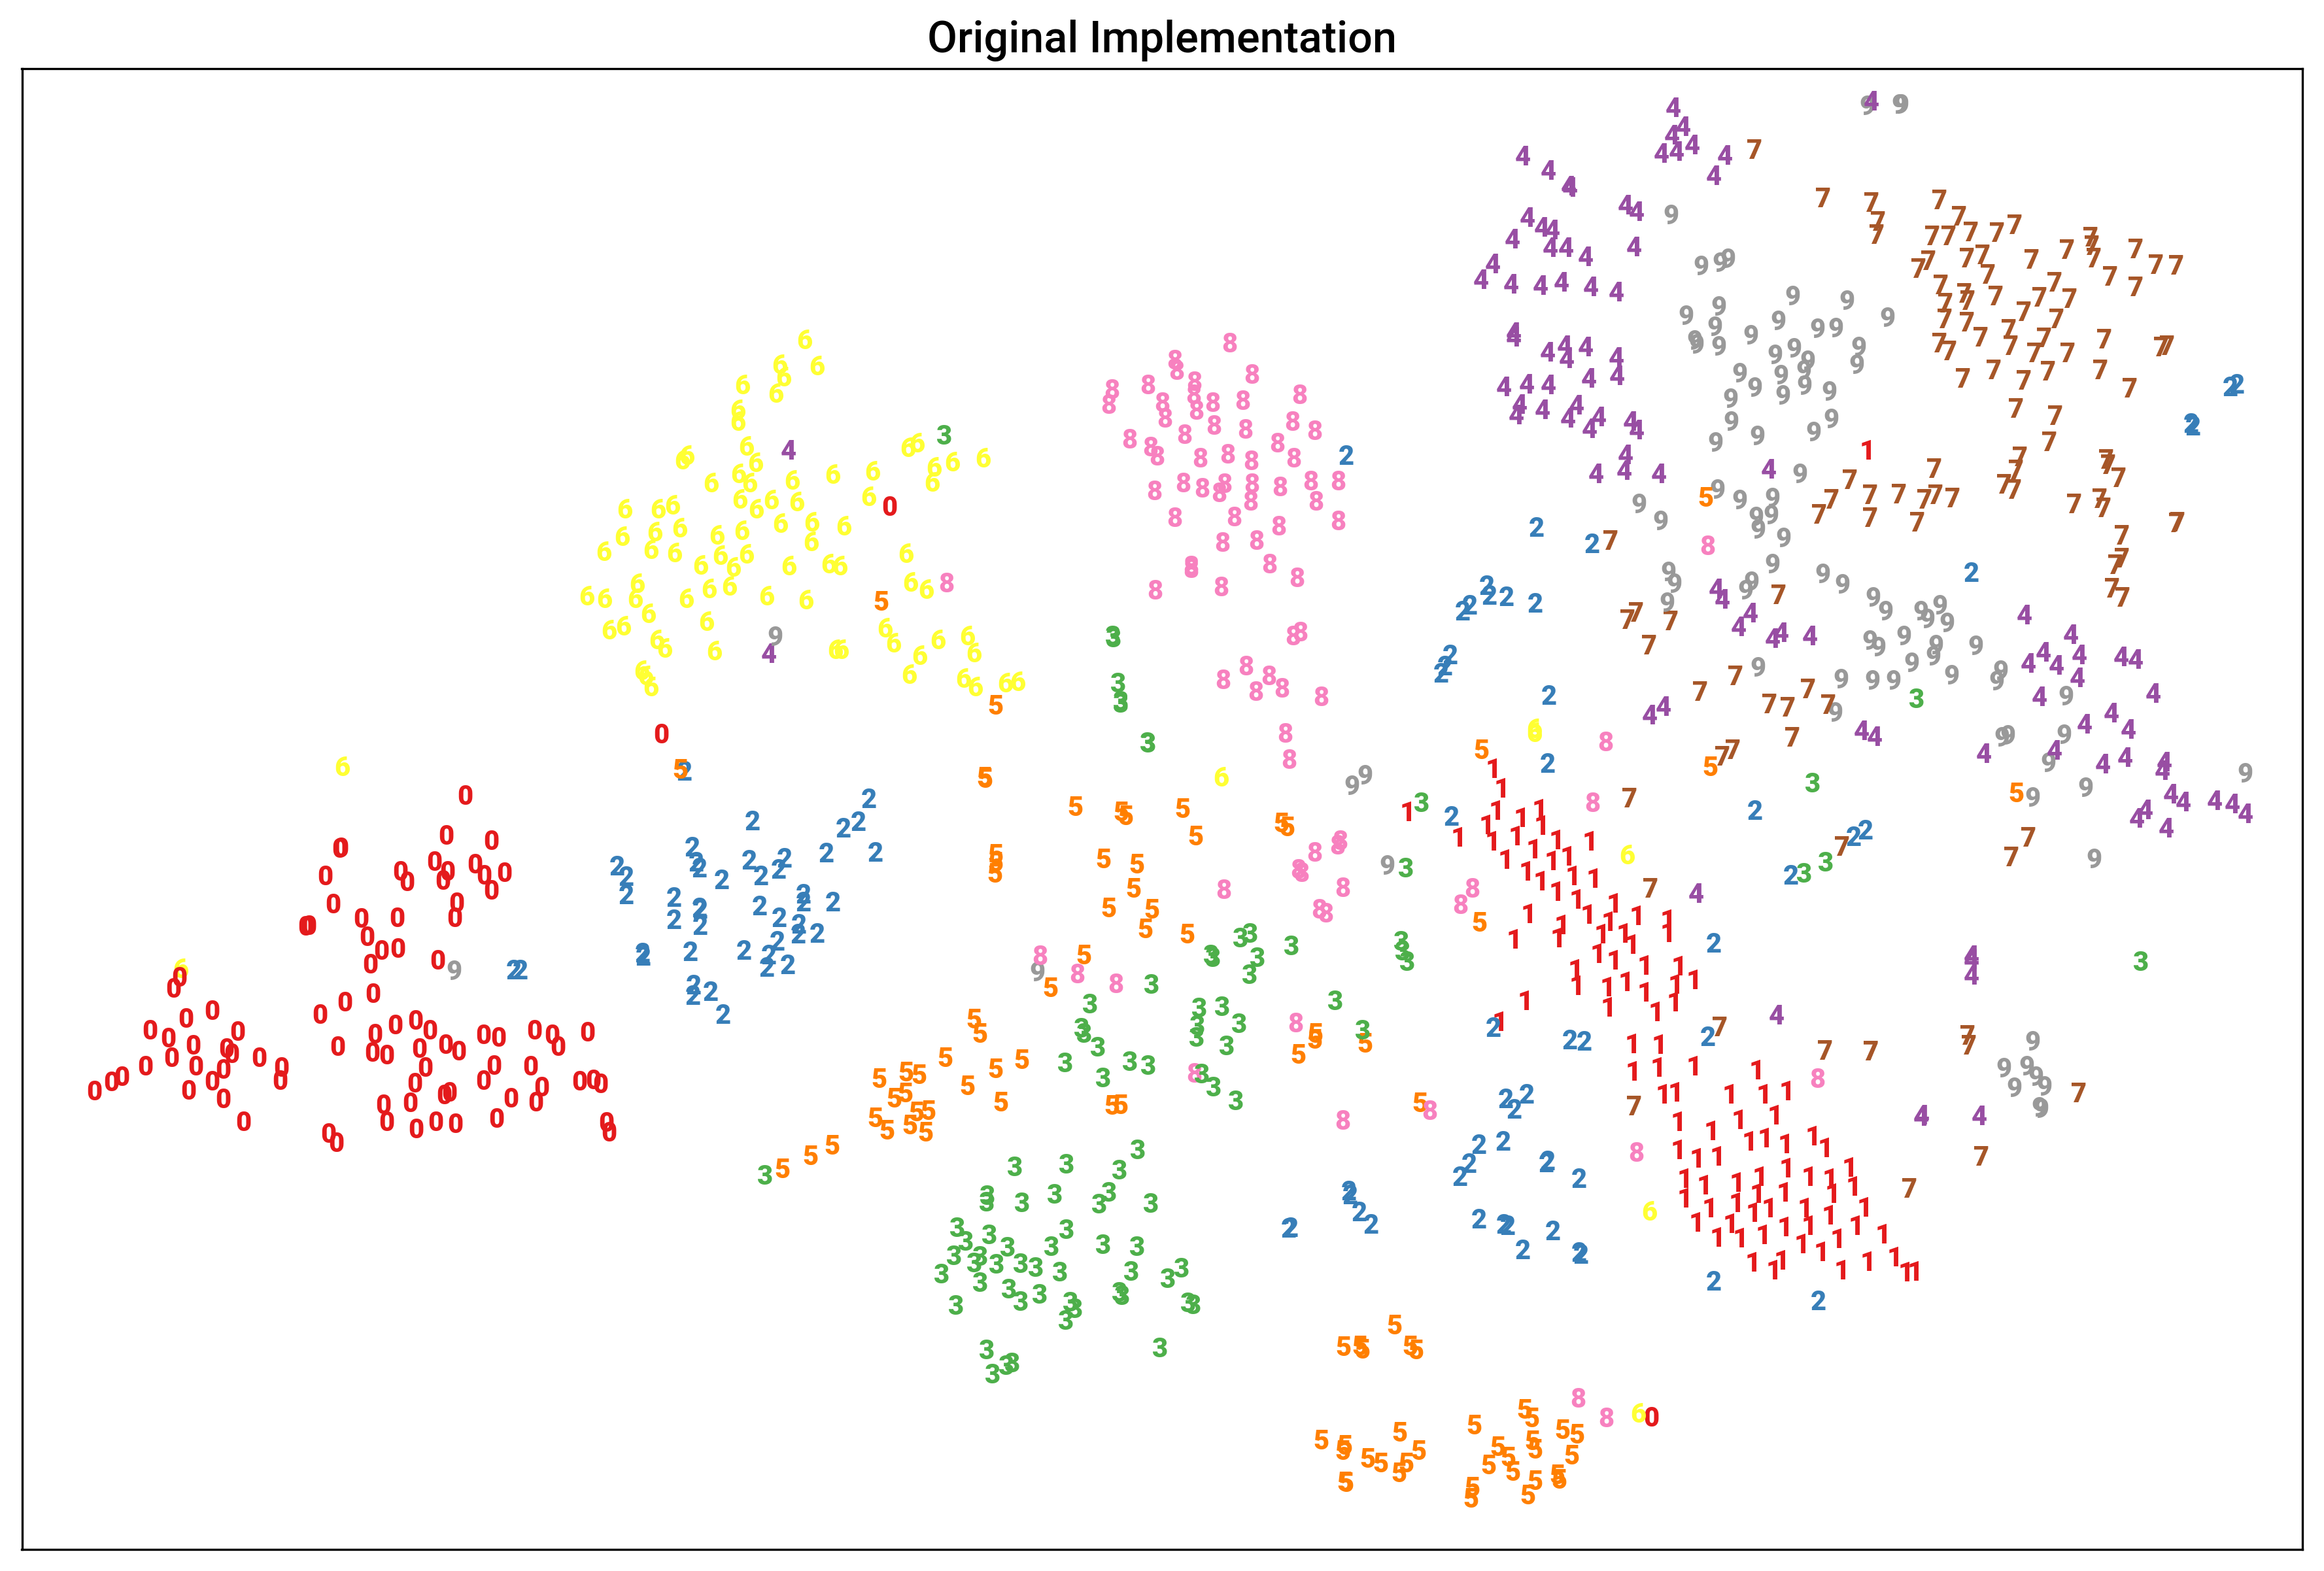

In [3]:
Y_original = read_results('../implementations/original/result.dat')
labels = read_labels('../../data/mnist/train-labels.idx1-ubyte')
plot_embedding(Y_original, labels, title="Original Implementation")

## t-SNE Exact Gradient Computation

N=1000	D=2


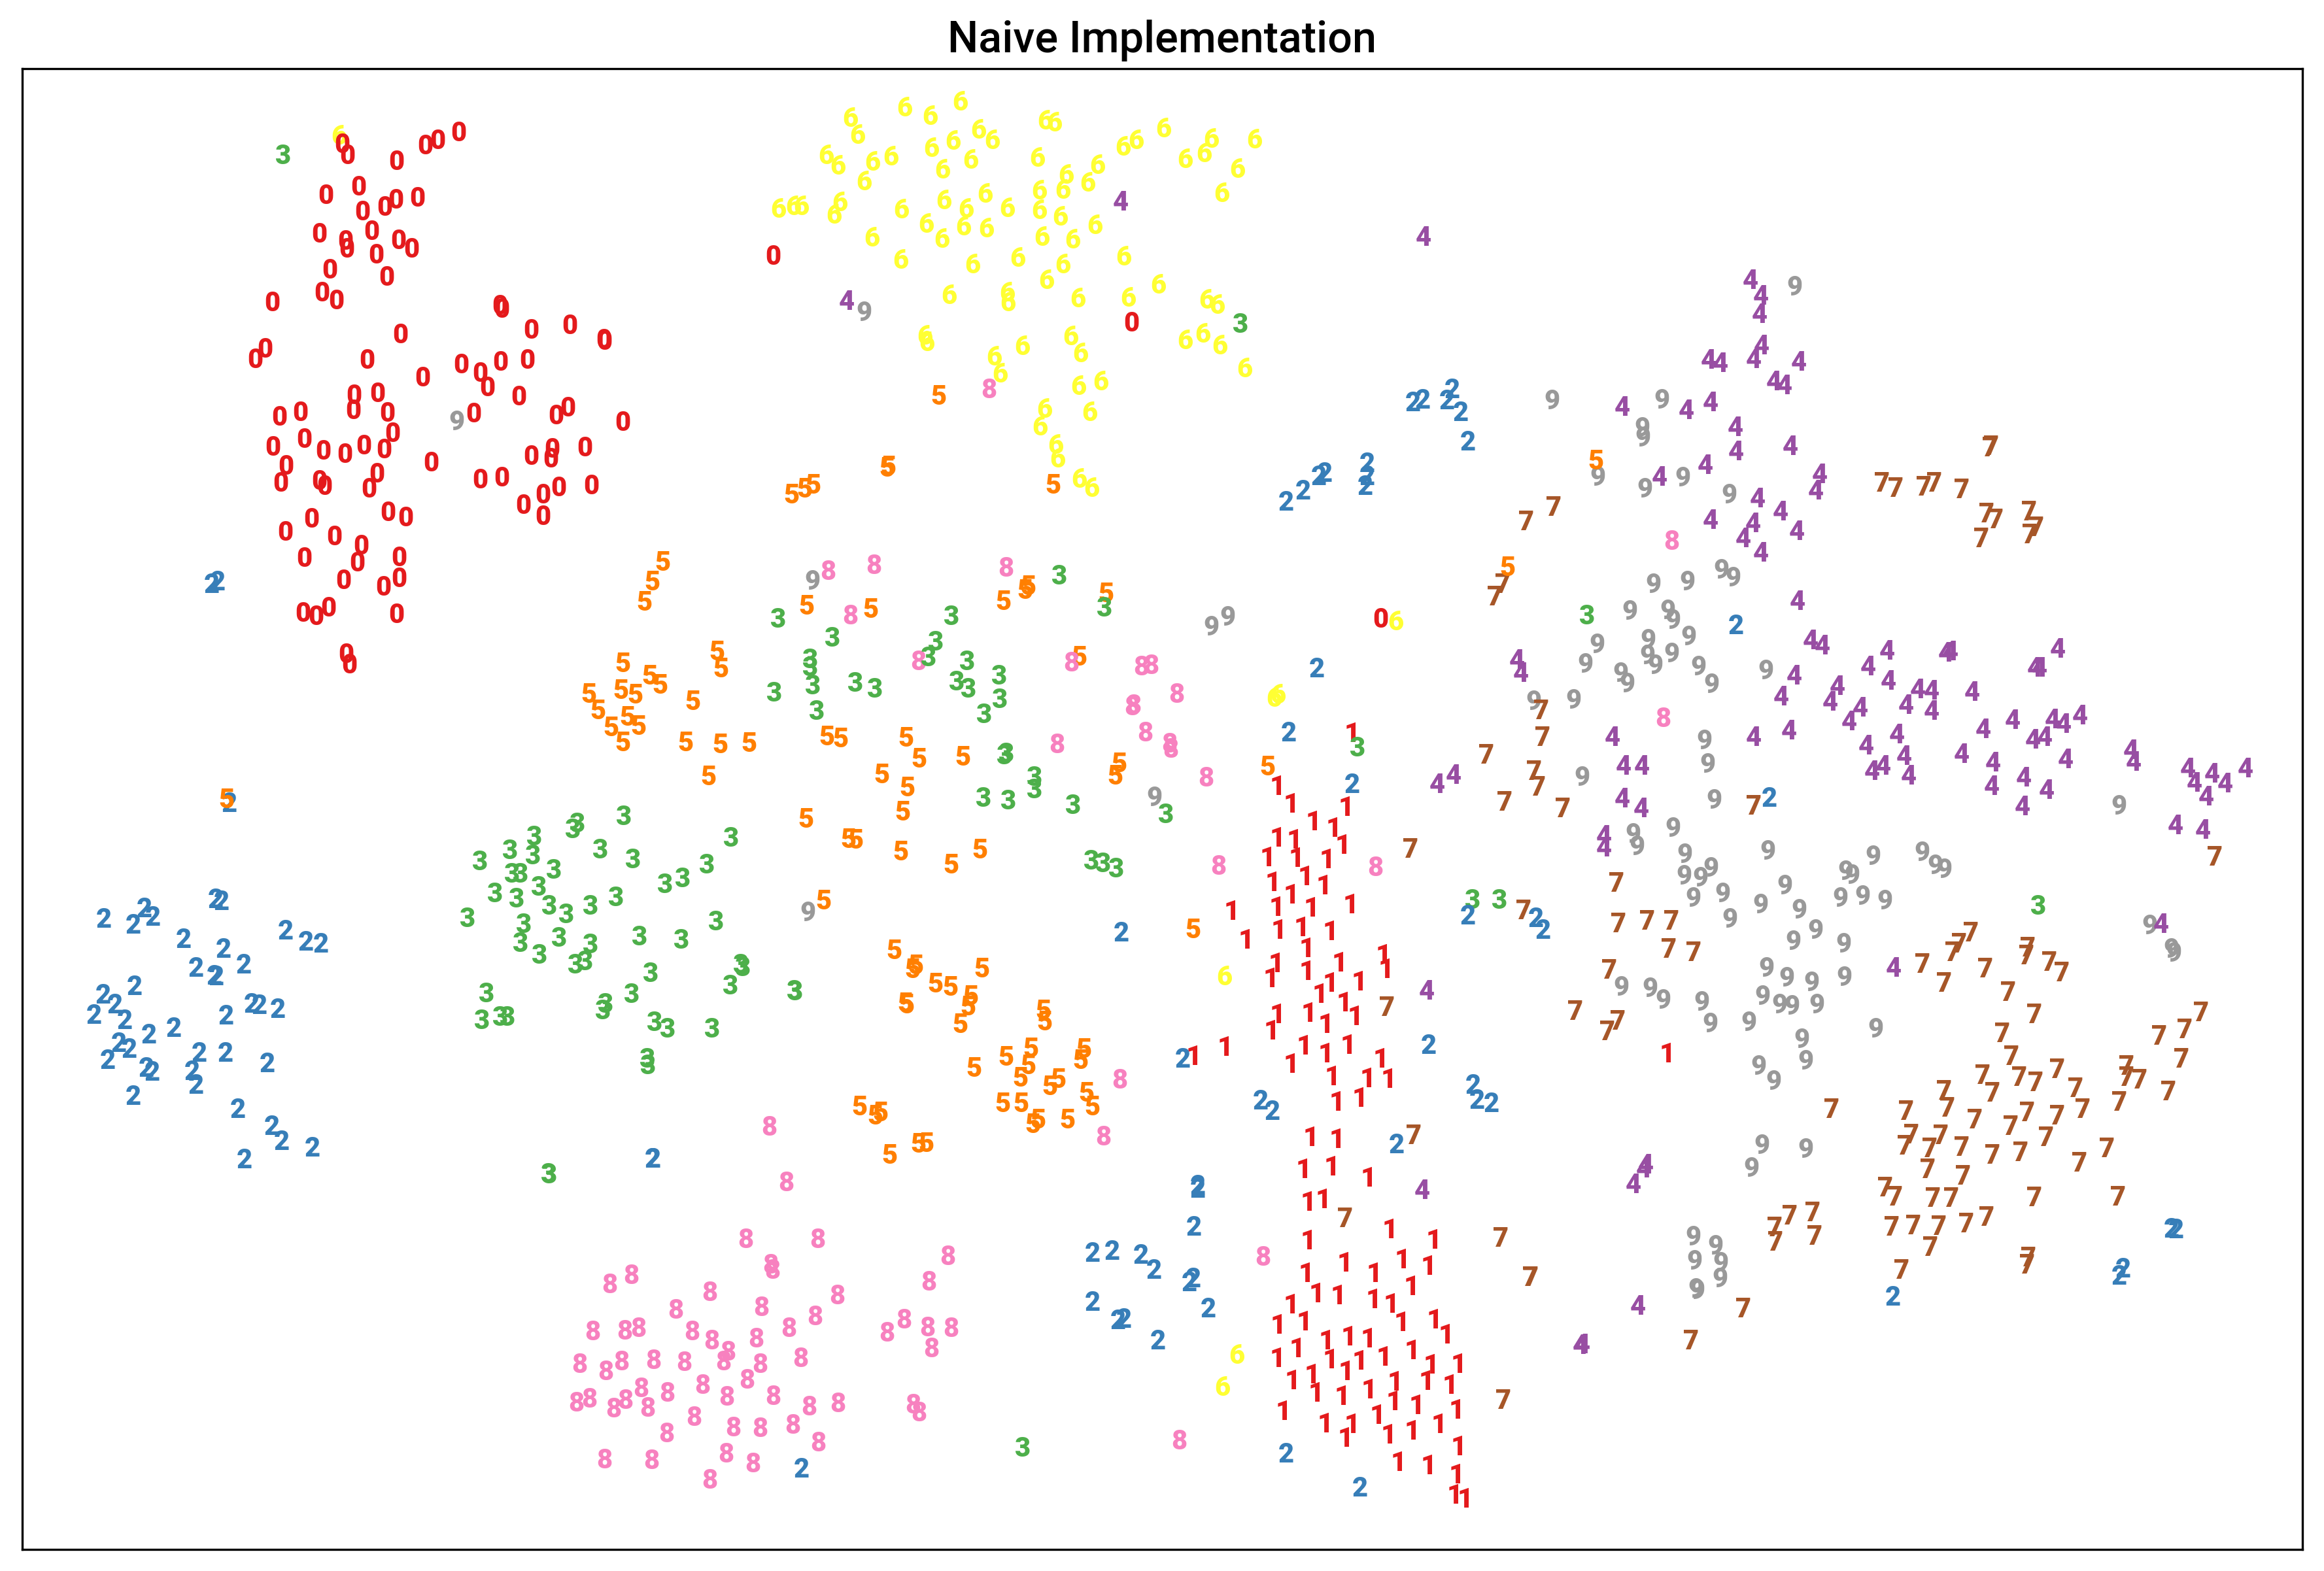

In [8]:
Y_naive = read_results('../implementations/tsne_exact/result.dat')
plot_embedding(Y_naive, labels, title="Naive Implementation")

N=1000	D=2


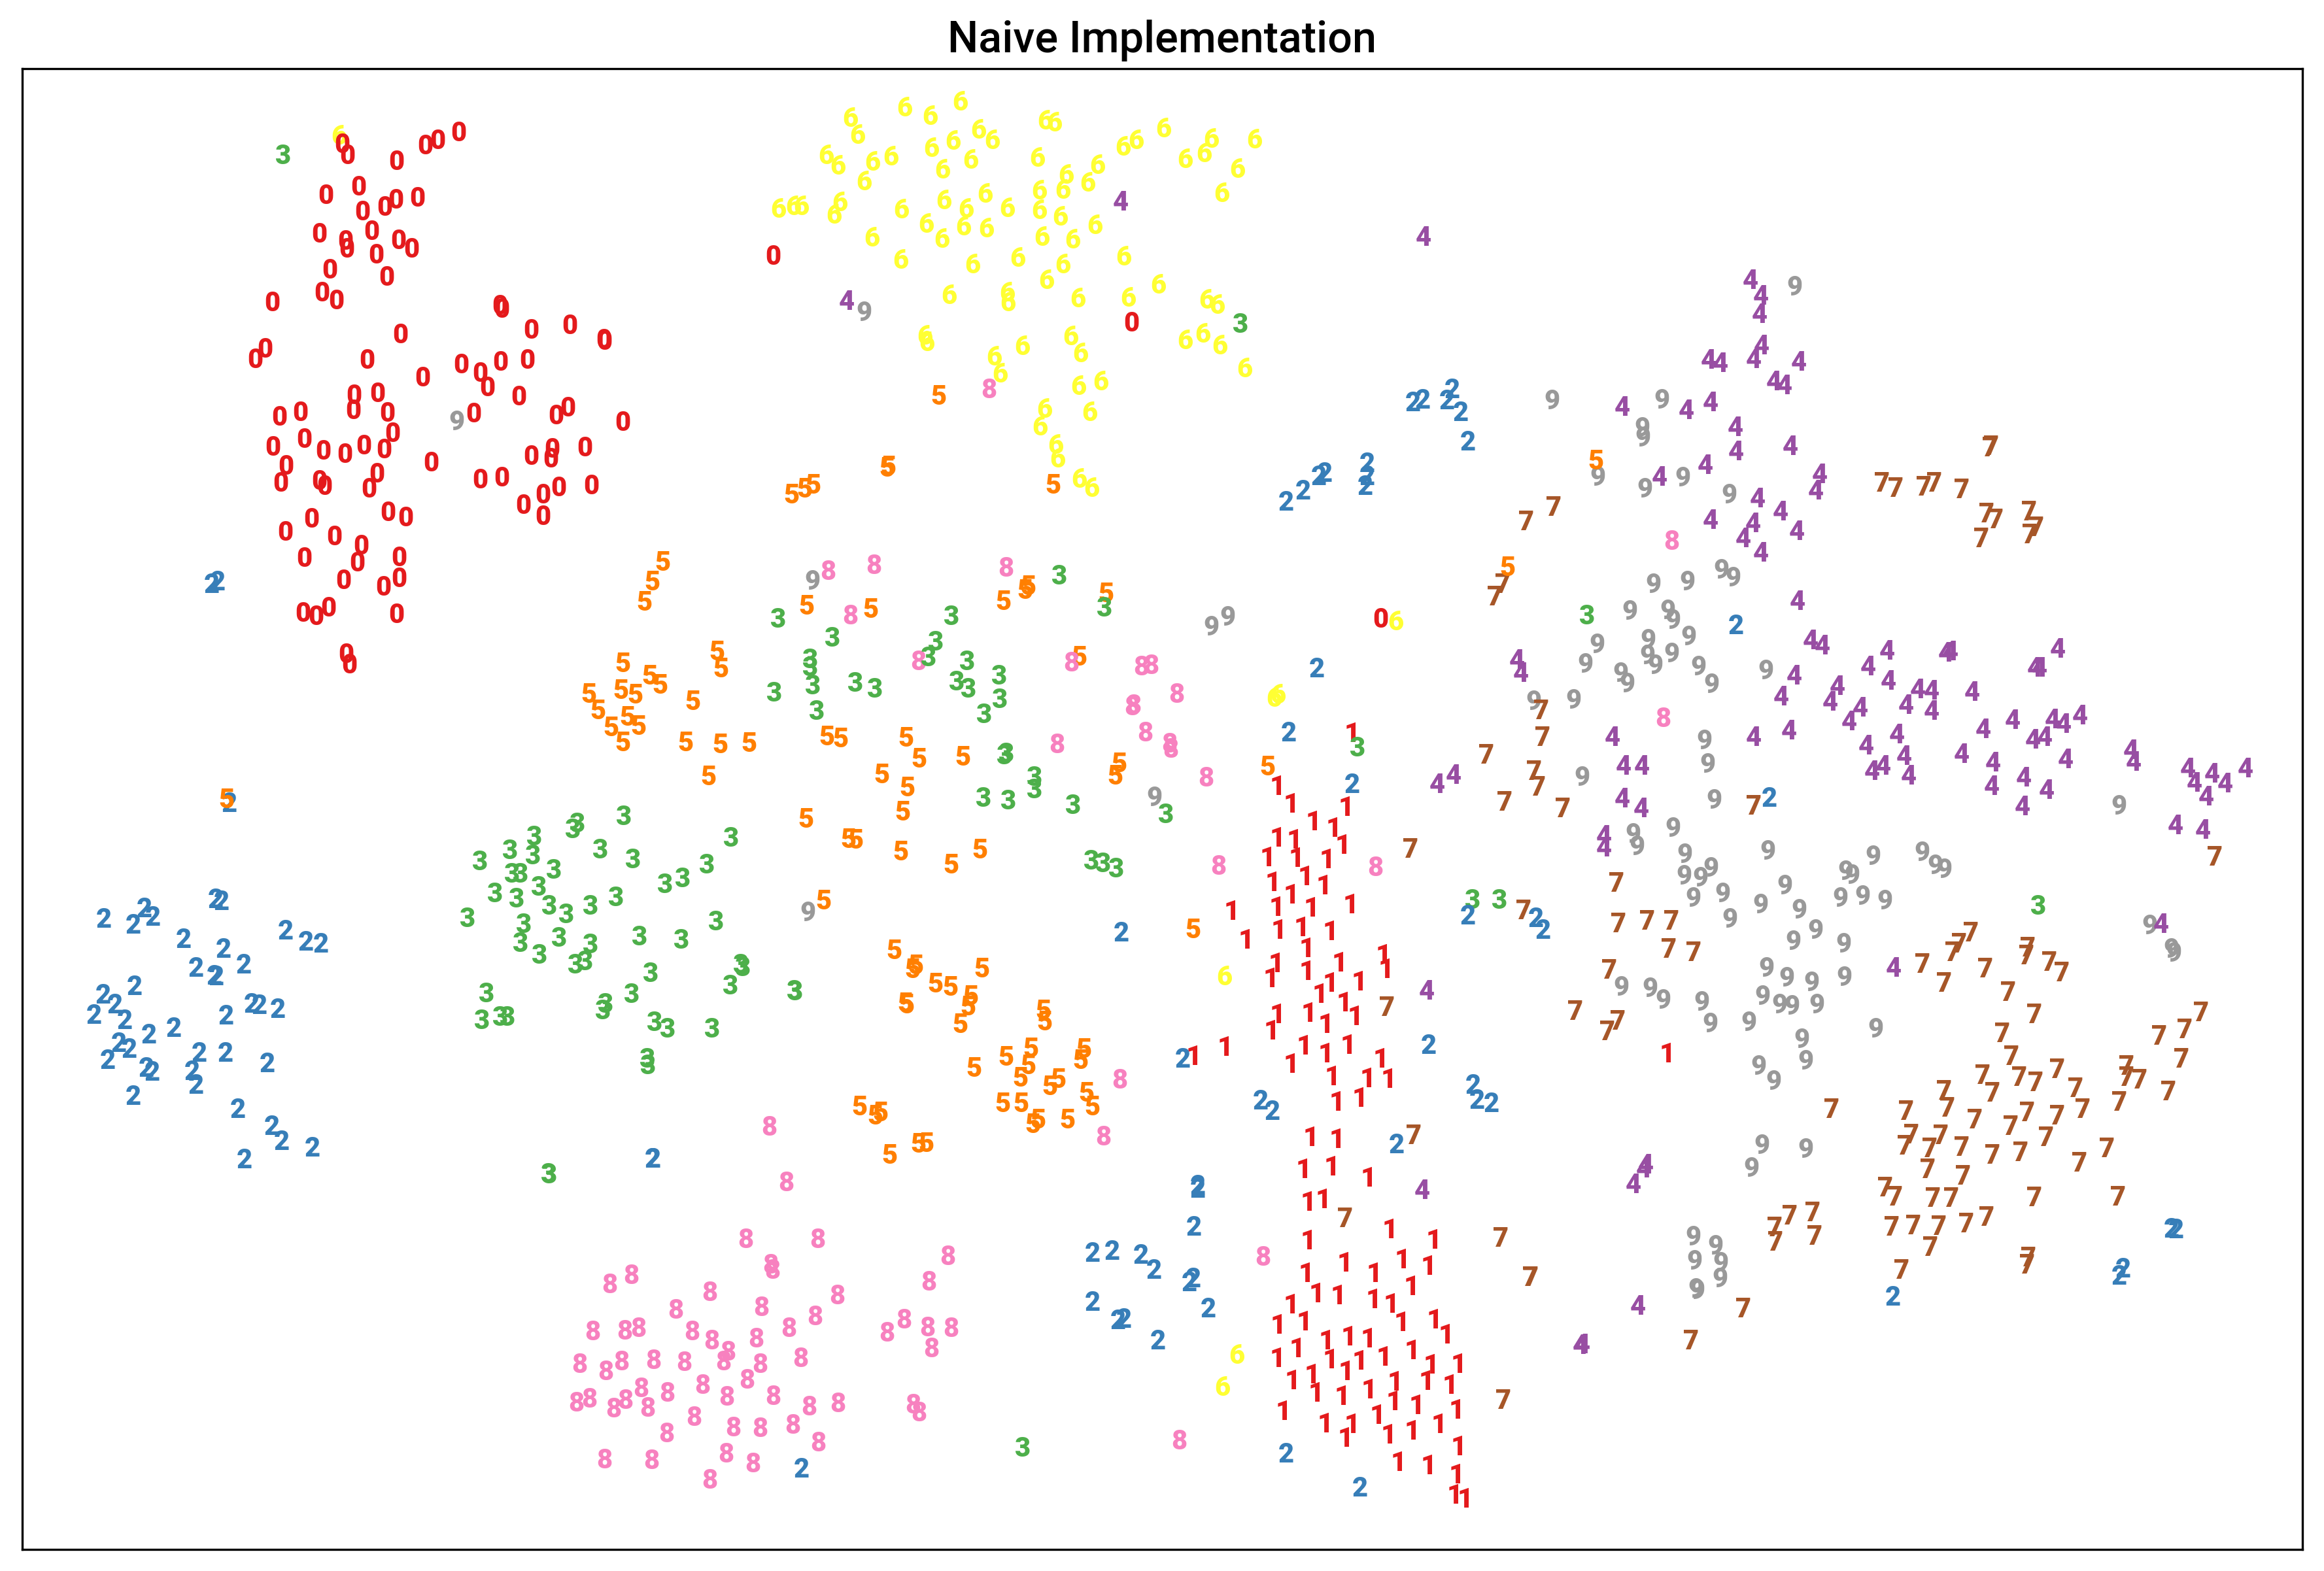

In [7]:
Y_naive = read_results('../implementations/tsne_exact_optimizations/result.dat')
plot_embedding(Y_naive, labels, title="Naive Implementation")